# SMS Spam Collection Dataset

<h3> Introduction</h3>
<b>Source:</b>

Tiago A. Almeida (talmeida ufscar.br) <br>
Department of Computer Science <br>
Federal University of Sao Carlos (UFSCar) <br>
Sorocaba, Sao Paulo - Brazil <br>




<b>Data Set Information:</b>

This corpus has been collected from free or free for research sources at the Internet: 
<ul>
<li> A collection of 425 SMS spam messages was manually extracted from the Grumbletext Web site. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages. The Grumbletext Web site is: [Web Link]. </li>
<li> A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. The NUS SMS Corpus is avalaible at: [Web Link]. </li>
<li> A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link]. </li>
<li>Finally, we have incorporated the SMS Spam Corpus v.0.1 Big. It has 1,002 SMS ham messages and 322 spam messages and it is public available at: [Web Link]. This corpus has been used in the following academic researches: </li>
</ul>

<b>Attribute Information:</b>

The collection is composed by just one text file, where each line has the correct class followed by the raw message. We offer some examples bellow: 
<ul>
<li>ham What you doing?how are you? </li>
<li>ham Ok lar... Joking wif u oni... </li>
<li>ham dun say so early hor... U c already then say... </li>
<li>ham MY NO. IN LUTON 0125698789 RING ME IF UR AROUND! H* </li>
<li>ham Siva is in hostel aha:-. </li>
<li>ham Cos i was out shopping wif darren jus now n i called him 2 ask wat present he wan lor. Then he started guessing who i was wif n he finally guessed darren lor. </li>
<li>spam FreeMsg: Txt: CALL to No: 86888 & claim your reward of 3 hours talk time to use from your phone now! ubscribe6GBP/ mnth inc 3hrs 16 stop?txtStop </li>
<li>spam Sunshine Quiz! Win a super Sony DVD recorder if you canname the capital of Australia? Text MQUIZ to 82277. B </li>
<li>spam URGENT! Your Mobile No 07808726822 was awarded a L2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9758 BOX95QU </li>
</ul>

<h3>Loading the data</h3>

In [1]:
import warnings
warnings.filterwarnings('ignore')

<h3>Import libraries</h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Reading the Data</h3>

In [3]:
df=pd.read_csv("SMSSpamCollection",sep="\t",names=['target','message'])
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.columns

Index(['target', 'message'], dtype='object')

In [5]:
df.groupby('target').describe()

message                                                               
         count unique                                                top freq
target                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [6]:
df['length'] = df['message'].apply(len)
df.head()

,target,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<h3> Shape of Data</h3>

In [8]:
df.shape

(5572, 3)

<h3>Information of data</h3>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 87.1+ KB


<h1> Exploratory Data Analysis</h1>


Text(0.5, 1.0, 'Target')

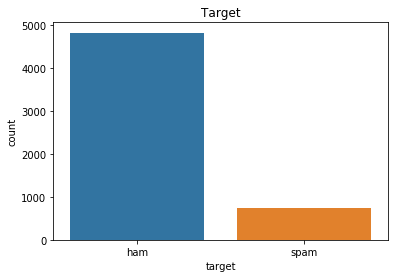

In [10]:
sns.countplot(x='target',data=df)
plt.title('Target')

<b> Observation </b>
<ul>
<li>Through this we conclude that count of ham is more than count of spam</li>
</ul>

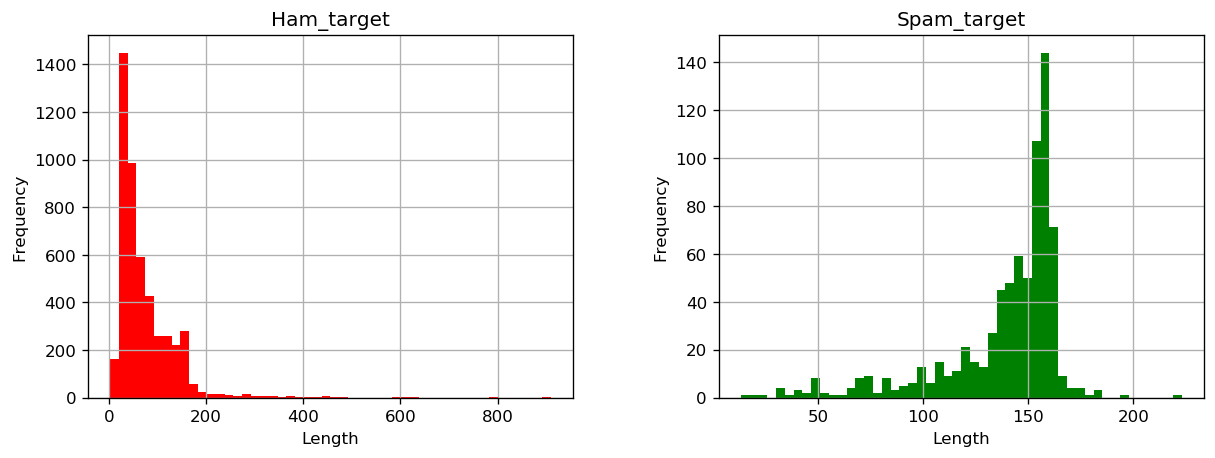

In [11]:
fig,ax = plt.subplots(1,2,figsize=(12,4),dpi = 120)
df[df['target']=='ham'].hist(column='length', bins=50,ax=ax[0],color = 'red')
ax[0].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Ham_target')
df[df['target']=='spam'].hist(column='length', bins=50,ax=ax[1],color = 'green')

ax[1].set(xlabel = 'Length',ylabel = 'Frequency',title = 'Spam_target');

<b>Observation</b>
<ul>
<li>The distribution of both seems to be completely different.</li>
<li>Through this histogram we can state that spam messages tend to have more characters. On other hand the ham messages tend to have less characters.</li>
</ul>

In [12]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

<h3>Preprocess the Data</h3>
<ul>
<li>Remove Special Characters</li>
<li>Conversion to lowercase</li>
<li>Tokenization</li>
<li>Stemming or Lemmatization</li>
</ul>

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
#Initailizing inbuilt stemmer
stemmer = PorterStemmer()

In [15]:
#use of lemmatization
lemmatizer = WordNetLemmatizer()

In [16]:
# initializing the lists

clean_message_lst = []

message_len_lst = []

In [17]:
def preprocess(raw_message, flag):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",raw_message)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokeniziation
    words = letters_only.split()
    
    # removing stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    #Stemming or Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_message_lst.append(" ".join(words))
    
    message_len_lst.append(len(words))

<h2>Data Preparation</h2>
<ul>
<li>Train Test Split</li>
<li>Identify Target Variable</li>
<li>Use Bag of Words to convert the text data to numerical Vectors</li>
</ul>

In [18]:
df.columns

Index(['target', 'message', 'length'], dtype='object')

In [19]:
from sklearn.model_selection  import train_test_split

train,test = train_test_split(df,test_size=0.3,random_state=25)

In [20]:
df['x']=df['target'].apply(lambda x: 0 if x=='ham' else 1)

In [28]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\S\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
clean_message_lst = []

message_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'stem'))

df['clean_message_stem'] = clean_message_lst

df['message_length_stem'] = message_len_lst

In [23]:
clean_message_lst = []

message_len_lst = []

df['message'].apply(lambda x: preprocess(x, 'lemma'))

df['clean_message_lema'] = clean_message_lst

df['message_length_lema'] = message_len_lst

In [24]:
df.head()

,target,message,length,x,clean_message_stem,message_length_stem,clean_message_lema,message_length_lema
0,ham,"Go until jurong point, crazy.. Available only ...",111,0,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,29,0,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,49,0,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,0,nah think goe usf live around though,7,nah think go usf life around though,7


In [30]:
from sklearn.model_selection  import train_test_split

train,test = train_test_split(df,test_size=0.3,random_state=25)

In [31]:
train.shape

(3900, 8)

In [32]:
test.shape

(1672, 8)

In [33]:
train_clean_message=[]
for message in train['clean_message_stem']:
    train_clean_message.append(message)

test_clean_message=[]
for message in test['clean_message_stem']:
    test_clean_message.append(message)

<h4> Use of CountVectorizer</h4>

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer='word')

train_features = vectorizer.fit_transform(train_clean_message)

test_features = vectorizer.transform(test_clean_message)

In [36]:
vectorizer.vocabulary_

{'urgent': 4867,
 'call': 647,
 'landlin': 2465,
 'complimentari': 893,
 'ibiza': 2129,
 'holiday': 2054,
 'cash': 693,
 'await': 323,
 'collect': 864,
 'sae': 3856,
 'cs': 998,
 'po': 3422,
 'box': 546,
 'sk': 4103,
 'wp': 5167,
 'ppm': 3475,
 'fear': 1551,
 'faint': 1518,
 'housework': 2087,
 'quick': 3616,
 'cuppa': 1020,
 'sunshin': 4404,
 'quiz': 3621,
 'wkli': 5122,
 'win': 5095,
 'top': 4696,
 'soni': 4202,
 'dvd': 1306,
 'player': 3406,
 'know': 2435,
 'countri': 956,
 'liverpool': 2571,
 'play': 3405,
 'mid': 2795,
 'week': 5036,
 'txt': 4783,
 'ansr': 183,
 'sp': 4224,
 'tyron': 4794,
 'bank': 366,
 'say': 3901,
 'money': 2875,
 'last': 2477,
 'chanc': 729,
 'claim': 807,
 'ur': 4863,
 'worth': 5156,
 'discount': 1192,
 'voucher': 4965,
 'today': 4658,
 'text': 4546,
 'shop': 4033,
 'savamob': 3898,
 'offer': 3144,
 'mobil': 2856,
 'pobox': 3423,
 'uz': 4891,
 'sub': 4372,
 'want': 4994,
 'funk': 1732,
 'fone': 1649,
 'weekli': 5039,
 'new': 3026,
 'tone': 4682,
 'repli': 374

In [37]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 5284
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (3900, 5284)


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

<h2> Train the model</h2>

In [64]:
Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    ]

<h3>Checking accuracy</h3>

In [49]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

for classifier in Classifiers:
    fit = classifier.fit(dense_features,train['x'])
    pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['x'])
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))

Accuracy of LogisticRegression is 0.9796650717703349
Accuracy of DecisionTreeClassifier is 0.97188995215311


<h3>Confusion Matrix and Classication Report</h3>

In [66]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
for classifier in Classifiers:
    fit = classifier.fit(dense_features,train['x'])
    pred = fit.predict(dense_test)
    con_metric=confusion_matrix(pred,test['x'])
    print('Confusion Matrix '+classifier.__class__.__name__+' is ' '\n'+str(con_metric))
    print('\n')
    print(classification_report(pred,test['x']))

Confusion Matrix LogisticRegression is 
[[1441   32]
 [   2  197]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1473
           1       0.86      0.99      0.92       199

    accuracy                           0.98      1672
   macro avg       0.93      0.98      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Confusion Matrix DecisionTreeClassifier is 
[[1430   37]
 [  13  192]]


              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1467
           1       0.84      0.94      0.88       205

    accuracy                           0.97      1672
   macro avg       0.91      0.96      0.93      1672
weighted avg       0.97      0.97      0.97      1672



<b>Observation</b>
<ul>
<li>Accuracy of LogisticRegression is 97.9%</li>
<li>Accuracy of DecisionTreeClassifier is 97.1%</li>
</ul>
